In [1]:
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import numpy as np

# Filtro RC

In [2]:
Vi = [1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.44, 1.44, 1.44, 1.44, 1.44, 1.44, 1.44, 1.44, 1.44, 1.44, 1.44, 1.44]
len(Vi)

20

In [3]:
Vo = [1.44, 1.44, 1.40, 1.40, 1.38, 1.35, 1.32, 1.29, 1.26, 1.23, 1.19, 1.16, 1.13, 1.09, 1.06, 1.03, 0.996, 0.965, 0.937, 0.888]
len(Vo)

20

In [4]:
K = []
for i in range(len(Vi)):
    K.append(Vo[i] / Vi[i])

K

[0.993103448275862,
 0.993103448275862,
 0.9655172413793103,
 0.9655172413793103,
 0.9517241379310344,
 0.9310344827586208,
 0.9103448275862069,
 0.8896551724137931,
 0.875,
 0.8541666666666667,
 0.8263888888888888,
 0.8055555555555556,
 0.7847222222222222,
 0.7569444444444445,
 0.7361111111111112,
 0.7152777777777778,
 0.6916666666666667,
 0.6701388888888888,
 0.6506944444444445,
 0.6166666666666667]

In [5]:
fase = [-3.60, -7.20, -10.8, -13.7, -17.1, -20.5, -23.5, -25.9, -28, -31.2, -34.4, -36.7, -38.2, -40.1, -41.9, -44.1, -45.7, -46.8, -49, -50.4]
len(fase)

20

In [6]:
f =[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000]
len(f)

20

##### Gráfico Amplitude Vout / Vi e magnitude

A fórmula utilizada para o cálculo da resposta em magnitude foi
$$
|H(\omega)| = \frac{1}{\sqrt{(\omega CR)^2 + 1} }
$$

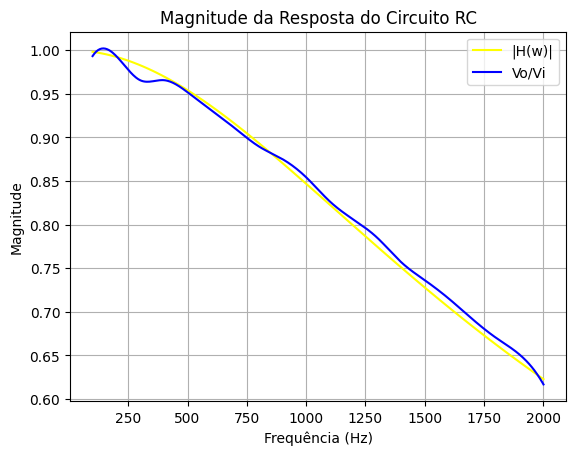

In [7]:
x = np.array(f)
y = np.array(K)

X_Y_Spline = make_interp_spline(x, y)

X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)

C = 10*10**-9
R = 10*10**3
frequencias = np.linspace(100, 2000, 100)
omega = 2 * np.pi * frequencias

H = 1 / np.sqrt(1 + (omega * R * C)**2) 


plt.figure()
plt.plot(frequencias, H, color='yellow', label='|H(w)|')
plt.plot(X_, Y_, color='blue', label='Vo/Vi')
plt.title('Magnitude da Resposta do Circuito RC')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)
plt.show()

##### Gráfico Fase
A fómula utilizada para calcular a fase foi

$$
\phi = \tan^{-1}(-\omega RC)
$$

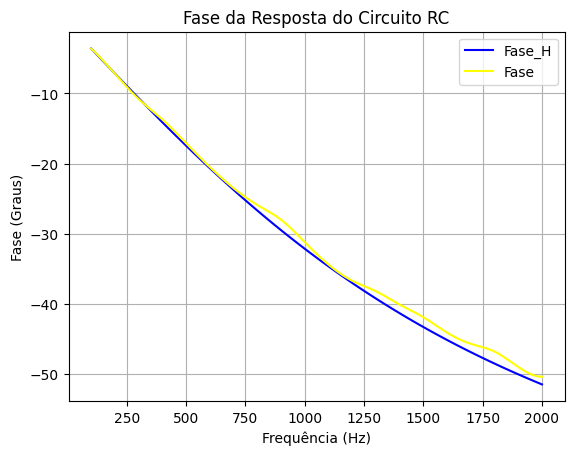

In [8]:
x = np.array(f)
y = np.array(fase)

X_Y_Spline = make_interp_spline(x, y)
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)

fase_H = np.arctan(-omega*R*C)
fase_H = np.degrees(fase_H)

plt.figure()
plt.plot(frequencias, fase_H, color='blue', label='Fase_H')
plt.plot(X_, Y_, color='yellow', label='Fase')
plt.title('Fase da Resposta do Circuito RC')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Fase (Graus)')
plt.legend()
plt.grid(True)
plt.show()